# Bootstrapping Language-Image Pretraining (BLIP) from HuggingFace Transformers

BLIP leverages both text and image data to enhance AI models' understanding and generation of image descriptions

### Introduction to BLIP
BLIP represents a significant advancement in the intersection of natural language processing (NLP) and computer vision. BLIP, designed to improve AI models, enhances their ability to understand and generate image descriptions. It learns to associate images with relevant text, allowing it to generate captions, answer image-related questions, and support image-based search queries.

### Why BLIP matter?
BLIP is crucial for several reasons:
<ul>
<li>Enhanced understanding: It provides a more nuanced understanding of the content within images, going beyond object recognition to comprehend scenes, actions, and interactions.
<li>Multimodal learning: By integrating text and image data, BLIP facilitates multimodal learning, which is closer to how humans perceive the world.
<li>Accessibility: Generating accurate image descriptions can make content more accessible to people with visual impairments.
<li>Content creation: It supports creative and marketing endeavors by generating descriptive texts for visual content, saving time and enhancing creativity.
</ul>

### Real-Time Use Case: Automated Photo Captioning
A practical application of BLIP is in developing an automated photo captioning system. Such a system can be used in diverse domains. It enhances social media platforms by suggesting captions for uploaded photos automatically. It also aids digital asset management systems by offering searchable descriptions for stored images.



In [ ]:
# import statements
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

In [ ]:
# initalize the processor and model from HuggingFace
model_name = "Salesforce/blip-image-captioning-base"
processor = BlipProcessor.from_pretrained(model_name)
model = BlipForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/287 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/506 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/990M [00:00<?, ?B/s]

Let's try the following image

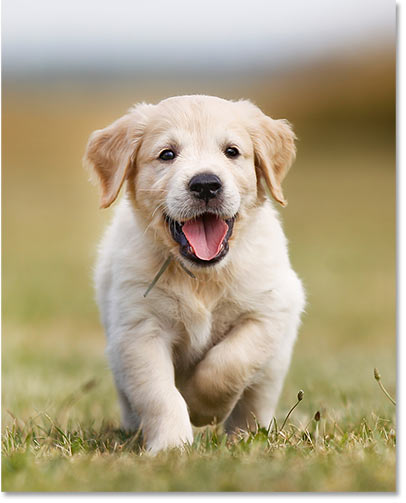

In [ ]:
# load an image
image = Image.open("/content/img.jpg")

# prepare the image
inputs = processor(image, return_tensors='pt')

In [ ]:
# generate captions
outputs = model.generate(**inputs)
caption = processor.decode(outputs[0], skip_special_tokens=True)

print("Generated Caption:", caption)

Generated Caption: a puppy running through a field of grass


Let's try on another image!

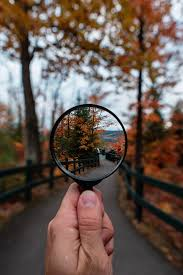

In [ ]:
# load an image
image2 = Image.open("/content/img2.jpeg")

# prepare the image
inputs2 = processor(image2, return_tensors='pt')

In [ ]:
# generate captions
outputs2 = model.generate(**inputs2)
caption2 = processor.decode(outputs2[0], skip_special_tokens=True)

print("Generated Caption:", caption2)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a person holding a magnit in their hand


### Visual Question Answering

BLIP can also answer questions about the content of an image.

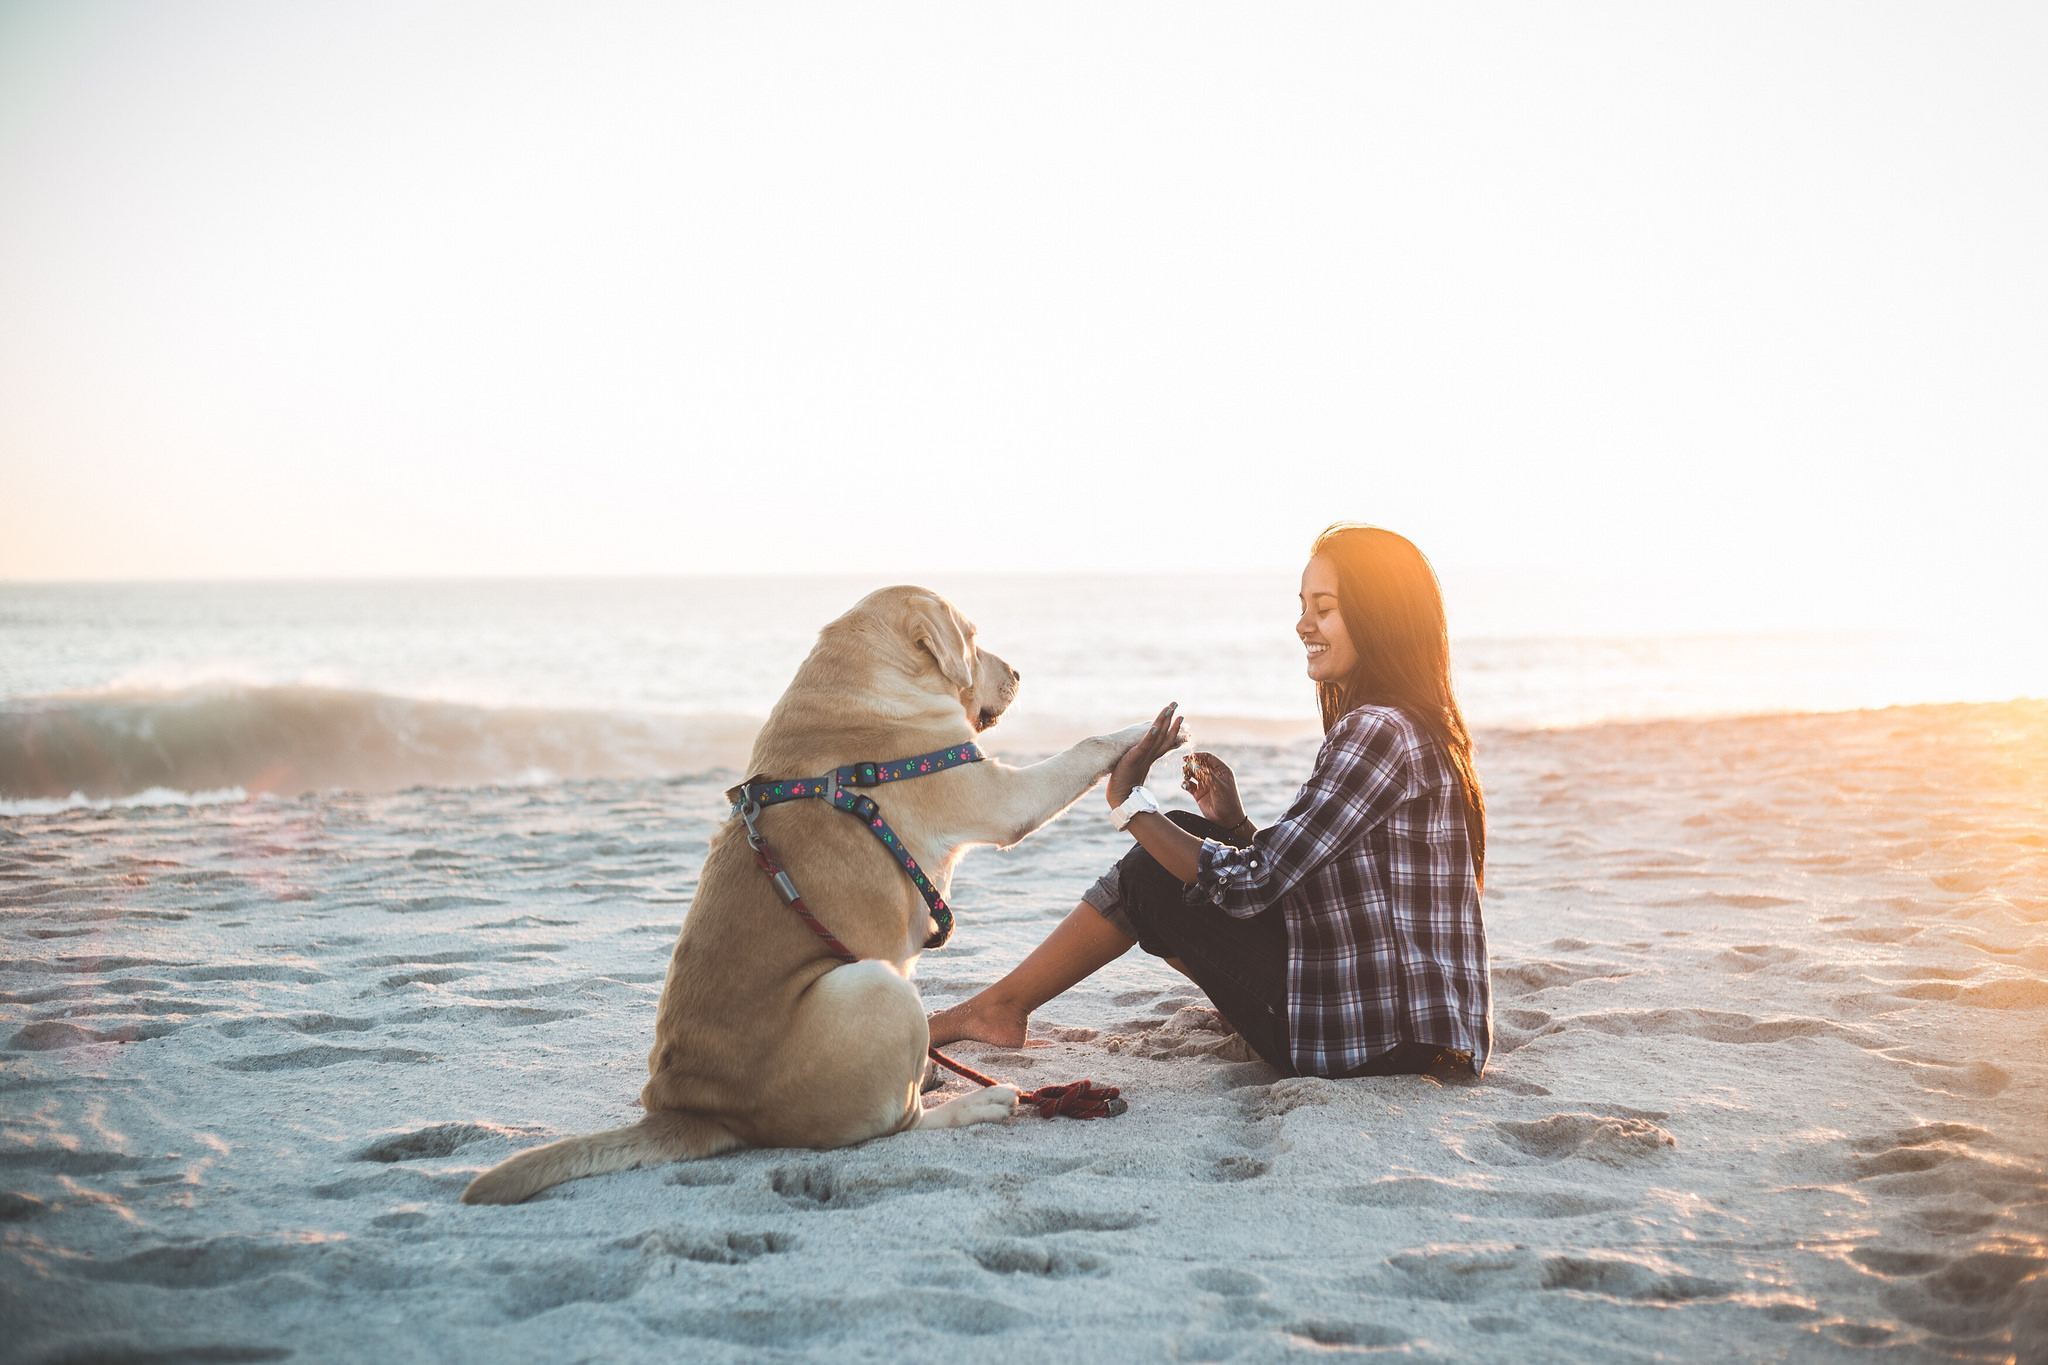

In [ ]:
import requests

img_url = "https://storage.googleapis.com/sfr-vision-language-research/BLIP/demo.jpg"
response = requests.get(img_url, stream=True)
raw_image = Image.open(response.raw).convert("RGB")
raw_image

In [ ]:
# conditional image captioning

text = "a photography of"
inputs = processor(raw_image, text=text, return_tensors='pt')

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a photography of a woman and her dog on the beach


In [ ]:
# unconditional image captioning

inputs = processor(raw_image, return_tensors='pt')

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a woman sitting on the beach with her dog


Let's try this on pinterest

In [ ]:
img_url = "https://i.pinimg.com/originals/ff/0e/5d/ff0e5d3b79db3e885967017aafe94ec8.jpg"
response = requests.get(img_url, stream=True)
raw_image = Image.open(response.raw).convert("RGB")

text = "shoe color is"
inputs = processor(raw_image, text=text, return_tensors='pt')

out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

shoe color is white


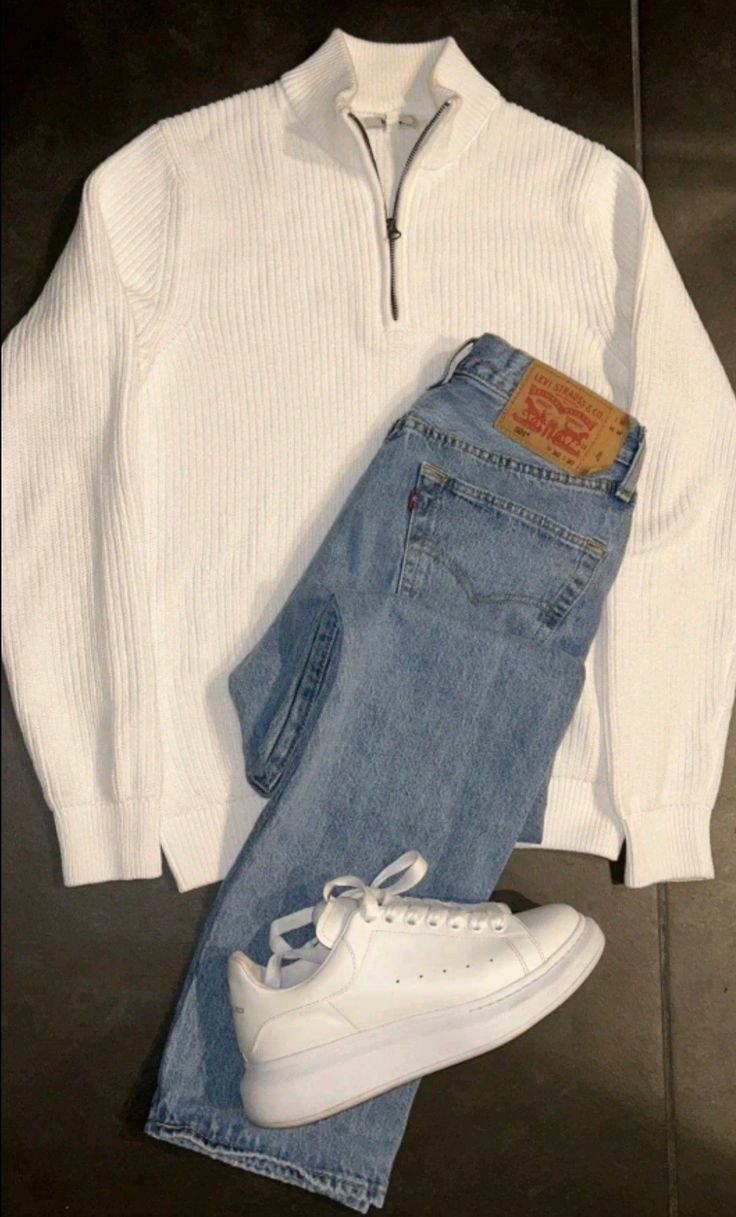

In [ ]:
raw_image